 # Abstract 
  El scouting en el futbol es una de las piezas claves en la pretemporada antes de arrancar los torneos como tambien a mitad de temporada. Por lo general siempre los quipos grandes fichan a los mejores jugadores por cuestiones economicas, la mayoria de estos jugadores que fichan son jugadores ya afianzados que ya "explotaron" su nivel y esperan que sigan mejorando. Con las herramientas y la plata de los equipos grandes, como les podrian competir los otros equipos a la hora de fichar jugadores? Siempre los buenos jugadores seran fichados por equipos grandes? Es posible contratar un jugador con alto potencial a un bajo costo?
  
  Al ser ambos fanaticos del mundo del futbol vimos una oportunidad a explotar en los fichajes, una ocasion donde los equipos más chicos economicamentes pueden fichar a jugadores que seran tan bueno o mejores que los de los grandes equipos y podrian llegar a ser estrellas con el buen manejo. Decidimos encarar este proyecto buscando lo mejor ya sea para el jugador que capaz que es muy bueno y nadie lo puede "explotar" tanto como a los equipos que no tienen el presupuesto.
  
  En nuestro trabajo de investigacion queremos lograr brindar una herramienta a los equipos para que puedan conseguir jugadores que con respecto a sus habilidades puedan tener un gran futuro, a bajo costo y que sea lo que el equipo necesite. El proyecto dejara buscar a los equipos que necesitan, por ejemplo un delantero y el modelo le brindara el mejor que pueda con un valor accesible. 
*   ¿Podemos categorizar a los jugadores para obtener los de potenciales altos a bajo precio?
* ¿Podremos conseguir una herramienta que nos proporcione candidatos a fichar?
*   ¿Cuales son las estadisticas, habilidades que explican mejor el rendimiento y potencial de un jugador?

# 1.Objetivo

El siguiente proyecto intenta brindar una ayuda hacia los scouter de equipos de fútbol.  A través del análisis de datos y herramientas de cientas de datos, se buscará aportar con nombres de jugadores como sugerencia de adquisiciones, en base a cierto presupuesto.  

# 2.Contexto de Negocio

Uno de los problemas a que se enfrentan los equipos de fútbol es la elección de los refuerzos para determinadas posiciones que formarán parte de la plantilla. Esta elección se realiza tomando en cuenta dos aspectos: Costos de la contratación de un jugador y el potencial técnico que posee.

# 3.Definición del Problema: 

* ¿Como podemos categorizar a los jugadores para contratar aquellos que pueden brindar una mayor rentabilidad de la inversión, en base al mayor potencial técnico que representan?
* Para determinado presupuesto y posición, ¿podremos tener una herramienta que nos proporcione un listado de jugadores candidatos a contratar?
* ¿Cuáles son las variables (condiciones técnicas) que explican de mejor manera el rendimiento y el potencial de un jugador?

#4.Lectura de archivos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
%cd /content/drive/MyDrive/Proyecto Data Sciense/Base de datos
pd.set_option('display.max_columns', None)

/content/drive/MyDrive/Proyecto Data Sciense/Base de datos


In [4]:
df=pd.read_csv('players_stats.csv')
print("Cantidad de filas y columnas:",df.shape) 
df.head()

Cantidad de filas y columnas: (518978, 56)


,Unnamed: 0,Unnamed: 0.1,captain,jerseyNumber,position,shirtNumber,substitute,player.country.alpha2,player.country.name,player.dateOfBirthTimestamp,player.firstName,player.id,player.lastName,player.marketValueCurrency,player.name,player.position,player.shortName,player.slug,player.userCount,statistics.accurateCross,statistics.accurateLongBalls,statistics.accuratePass,statistics.aerialLost,statistics.aerialWon,statistics.bigChanceCreated,statistics.bigChanceMissed,statistics.blockedScoringAttempt,statistics.challengeLost,statistics.dispossessed,statistics.duelLost,statistics.duelWon,statistics.fouls,statistics.goals,statistics.interceptionWon,statistics.keyPass,statistics.minutesPlayed,statistics.onTargetScoringAttempt,statistics.ownGoals,statistics.outfielderBlock,statistics.possessionLostCtrl,statistics.punches,statistics.rating,statistics.savedShotsFromInsideTheBox,statistics.saves,statistics.shotOffTarget,statistics.totalClearance,statistics.totalContest,statistics.totalCross,statistics.totalLongBalls,statistics.totalOffside,statistics.totalPass,statistics.totalTackle,statistics.touches,statistics.wasFouled,statistics.wonContest,statistics
0,0,0,NaN,1.0,G,1.0,False,ES,Spain,796003200.0,NaN,791773,NaN,EUR,Álex Remiro,G,Á. Remiro,alex-remiro,561,NaN,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,5.0,NaN,6.7,3.0,4.0,NaN,NaN,NaN,NaN,6.0,NaN,16.0,NaN,24.0,NaN,NaN,NaN
1,1,1,NaN,18.0,D,18.0,False,ES,Spain,839116800.0,NaN,866810,NaN,EUR,Andoni Gorosabel,D,A. Gorosabel,andoni-gorosabel,242,NaN,NaN,26.0,1.0,1.0,NaN,NaN,1.0,2.0,NaN,6.0,5.0,2.0,NaN,2.0,NaN,90.0,NaN,NaN,NaN,17.0,NaN,6.1,NaN,NaN,NaN,3.0,1.0,3.0,5.0,NaN,35.0,4.0,60.0,NaN,NaN,NaN
2,2,2,NaN,5.0,D,5.0,False,ES,Spain,859680000.0,NaN,838159,NaN,EUR,Igor Zubeldia,D,I. Zubeldia,igor-zubeldia,387,NaN,NaN,36.0,NaN,3.0,NaN,NaN,NaN,1.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,90.0,NaN,NaN,1.0,10.0,NaN,6.4,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,46.0,1.0,55.0,NaN,NaN,NaN
3,3,3,NaN,15.0,D,15.0,False,FR,France,924048000.0,NaN,904759,NaN,EUR,Modibo Sagnan,D,M. Sagnan,modibo-sagnan,271,NaN,1.0,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN,NaN,NaN,45.0,1.0,NaN,NaN,5.0,NaN,6.4,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,16.0,2.0,22.0,NaN,NaN,NaN
4,4,4,NaN,12.0,D,12.0,False,ES,Spain,871689600.0,NaN,966441,NaN,EUR,Aihen Muñoz,D,A. Muñoz,aihen-munoz,276,NaN,NaN,24.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,4.0,5.0,3.0,NaN,1.0,NaN,90.0,NaN,NaN,NaN,12.0,NaN,6.3,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,28.0,1.0,54.0,NaN,3.0,NaN


In [5]:
df['player.id'].nunique()

59713

In [6]:
dfa=pd.read_csv('player.csv')
print("Cantidad de filas y columnas:",dfa.shape) 
dfa.head()

Cantidad de filas y columnas: (13755, 6)


,Unnamed: 0,player.id,player.marketValue,player.shortName,player.team.name,player.team.primaryUniqueTournament.name
0,10,791773.0,23000000.0,Á. Remiro,Real Sociedad,LaLiga
1,11,866810.0,7800000.0,A. Gorosabel,Real Sociedad,LaLiga
2,12,838159.0,15800000.0,I. Zubeldia,Real Sociedad,LaLiga
3,13,904759.0,3100000.0,M. Sagnan,FC Utrecht,Eredivisie
4,14,966441.0,6200000.0,A. Muñoz,Real Sociedad,LaLiga


In [7]:
dfa['player.id'].nunique()

11443

Vemos que hay 518978 filas pero solo 59713 jugadores distintos, esto es porque el mismo jugador tiene varias filas por los distintos partidos jugados en los distintos meses. Por lo tanto hay que trabajar el dataframe para que cada jugador tenga una sola fila con los valores sumados de sus estadisticas.
En la otra base de datos donde se encuentra el valor del mercado, hay solo 11443 jugadores. Uniremos las 2 tablas donde tengamos los 59713 jugadores de la primera tabla y trabajaremos para imputar los valores de mercado que falten.

#5.Data wrangling


In [8]:
#Elimino las columnas que no interesan en nuestro analisis
df = df.drop(['Unnamed: 0','Unnamed: 0.1','substitute','captain','player.country.alpha2','player.dateOfBirthTimestamp','player.position','player.firstName','player.lastName','player.shortName','player.slug','player.userCount','statistics'],axis=1)
#Reacomodo las columnas para poder ver lo importante primero
df = df[['player.id','player.name','jerseyNumber','position','shirtNumber','player.country.name','statistics.minutesPlayed','player.marketValueCurrency','statistics.accurateCross','statistics.accurateLongBalls','statistics.accuratePass','statistics.aerialLost','statistics.aerialWon','statistics.bigChanceCreated','statistics.bigChanceMissed','statistics.blockedScoringAttempt','statistics.challengeLost','statistics.dispossessed','statistics.duelLost','statistics.duelWon','statistics.fouls','statistics.goals','statistics.interceptionWon','statistics.keyPass','statistics.onTargetScoringAttempt','statistics.ownGoals','statistics.outfielderBlock','statistics.possessionLostCtrl','statistics.punches','statistics.rating','statistics.savedShotsFromInsideTheBox',
 'statistics.saves','statistics.shotOffTarget','statistics.totalClearance','statistics.totalContest','statistics.totalCross','statistics.totalLongBalls','statistics.totalOffside','statistics.totalPass','statistics.totalTackle','statistics.touches','statistics.wasFouled','statistics.wonContest']]
#Elimino "statistics" del nombre de las columnas
columnas = list(df.columns)
columnass = [a.replace('statistics.','')for a in columnas]
df.columns=columnass
df = df.fillna(0) 
df.head()

,player.id,player.name,jerseyNumber,position,shirtNumber,player.country.name,minutesPlayed,player.marketValueCurrency,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
0,791773,Álex Remiro,1.0,G,1.0,Spain,90.0,EUR,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,6.7,3.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,16.0,0.0,24.0,0.0,0.0
1,866810,Andoni Gorosabel,18.0,D,18.0,Spain,90.0,EUR,0.0,0.0,26.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,6.0,5.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,17.0,0.0,6.1,0.0,0.0,0.0,3.0,1.0,3.0,5.0,0.0,35.0,4.0,60.0,0.0,0.0
2,838159,Igor Zubeldia,5.0,D,5.0,Spain,90.0,EUR,0.0,0.0,36.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,0.0,6.4,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,46.0,1.0,55.0,0.0,0.0
3,904759,Modibo Sagnan,15.0,D,15.0,France,45.0,EUR,0.0,1.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,6.4,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,16.0,2.0,22.0,0.0,0.0
4,966441,Aihen Muñoz,12.0,D,12.0,Spain,90.0,EUR,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,6.3,0.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0,28.0,1.0,54.0,0.0,3.0


In [9]:
df2 = df[['player.name','player.id','position','player.country.name']]
#Elimino los jugadores duplicados en una tabla donde solo tiene la informacion cualitativa y que no cambia
df3 = df2.drop_duplicates(subset = ['player.id'],keep='first')
#En otra tabla sumo todas las variables cuantitativas con respecto al player.id()
df4 = df.drop(['player.name', 'jerseyNumber','position','shirtNumber','player.country.name','player.marketValueCurrency'], axis=1, inplace=True)
df4 = df.groupby(['player.id']).sum()

In [10]:
#Unimos las 2 tablas obteniendo la tabla final
df5 = pd.merge(left=df3,right=df4, on='player.id',how='inner')
print(df5.shape)
# df5.sort_values(by='rating',ascending = False).head()
df5.head()

(59713, 40)


,player.name,player.id,position,player.country.name,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
0,Álex Remiro,791773,G,Spain,1260.0,0.0,46.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,114.0,0.0,91.0,30.0,40.0,0.0,0.0,0.0,0.0,160.0,0.0,284.0,0.0,384.0,0.0,0.0
1,Andoni Gorosabel,866810,D,Spain,1260.0,0.0,0.0,324.0,22.0,14.0,0.0,0.0,10.0,20.0,8.0,88.0,62.0,32.0,0.0,20.0,8.0,0.0,0.0,4.0,230.0,0.0,84.6,0.0,0.0,0.0,30.0,14.0,42.0,66.0,0.0,446.0,40.0,772.0,4.0,4.0
2,Igor Zubeldia,838159,D,Spain,900.0,0.0,0.0,360.0,0.0,30.0,0.0,0.0,0.0,10.0,0.0,10.0,40.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,100.0,0.0,64.0,0.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,460.0,10.0,550.0,0.0,0.0
3,Modibo Sagnan,904759,D,France,630.0,0.0,14.0,240.0,0.0,14.0,4.0,0.0,4.0,0.0,0.0,24.0,42.0,34.0,0.0,4.0,4.0,10.0,0.0,0.0,62.0,0.0,91.6,0.0,0.0,4.0,10.0,8.0,4.0,34.0,0.0,284.0,20.0,376.0,0.0,8.0
4,Aihen Muñoz,966441,D,Spain,900.0,0.0,0.0,240.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,40.0,50.0,30.0,0.0,10.0,0.0,0.0,0.0,0.0,120.0,0.0,63.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,0.0,280.0,10.0,540.0,0.0,30.0


In [11]:
dfa = dfa.drop_duplicates(subset = ['player.id'],keep='first')
dfa = dfa.drop(['player.shortName','Unnamed: 0'],axis=1)
dfa.shape

(11443, 4)

In [12]:
data = pd.merge(left=dfa,right=df5,on='player.id',how='right')
data.head()

,player.id,player.marketValue,player.team.name,player.team.primaryUniqueTournament.name,player.name,position,player.country.name,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
0,791773.0,23000000.0,Real Sociedad,LaLiga,Álex Remiro,G,Spain,1260.0,0.0,46.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,114.0,0.0,91.0,30.0,40.0,0.0,0.0,0.0,0.0,160.0,0.0,284.0,0.0,384.0,0.0,0.0
1,866810.0,7800000.0,Real Sociedad,LaLiga,Andoni Gorosabel,D,Spain,1260.0,0.0,0.0,324.0,22.0,14.0,0.0,0.0,10.0,20.0,8.0,88.0,62.0,32.0,0.0,20.0,8.0,0.0,0.0,4.0,230.0,0.0,84.6,0.0,0.0,0.0,30.0,14.0,42.0,66.0,0.0,446.0,40.0,772.0,4.0,4.0
2,838159.0,15800000.0,Real Sociedad,LaLiga,Igor Zubeldia,D,Spain,900.0,0.0,0.0,360.0,0.0,30.0,0.0,0.0,0.0,10.0,0.0,10.0,40.0,0.0,0.0,10.0,0.0,0.0,0.0,10.0,100.0,0.0,64.0,0.0,0.0,0.0,50.0,0.0,0.0,30.0,0.0,460.0,10.0,550.0,0.0,0.0
3,904759.0,3100000.0,FC Utrecht,Eredivisie,Modibo Sagnan,D,France,630.0,0.0,14.0,240.0,0.0,14.0,4.0,0.0,4.0,0.0,0.0,24.0,42.0,34.0,0.0,4.0,4.0,10.0,0.0,0.0,62.0,0.0,91.6,0.0,0.0,4.0,10.0,8.0,4.0,34.0,0.0,284.0,20.0,376.0,0.0,8.0
4,966441.0,6200000.0,Real Sociedad,LaLiga,Aihen Muñoz,D,Spain,900.0,0.0,0.0,240.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0,40.0,50.0,30.0,0.0,10.0,0.0,0.0,0.0,0.0,120.0,0.0,63.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,0.0,280.0,10.0,540.0,0.0,30.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59713 entries, 0 to 59712
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   player.id                                 59713 non-null  float64
 1   player.marketValue                        10549 non-null  float64
 2   player.team.name                          11443 non-null  object 
 3   player.team.primaryUniqueTournament.name  10418 non-null  object 
 4   player.name                               59713 non-null  object 
 5   position                                  59713 non-null  object 
 6   player.country.name                       59713 non-null  object 
 7   minutesPlayed                             59713 non-null  float64
 8   accurateCross                             59713 non-null  float64
 9   accurateLongBalls                         59713 non-null  float64
 10  accuratePass                      

In [14]:
data.shape

(59713, 43)

En el dataframe se observa ademas del nombre, la nacionalidad y posicion del jugador la cantidad de goles, pases, offsides, tiros al arco, tackles, duelos aereos ganados entre tantas otras estadisticas.

Ya teniendo la base de datos, podemos empezar a trabajar.

# 6.Análisis Exploratorio de Datos
La siguiente base de datos se la obtuvo de una API de futbol https://apifootball.com/. La informacion se encontraba muy engorrosa, para sacar el ID del jugador se necesitaba los partidos que el jugador habia jugado en un año, se fue dividiendo la solicitud de la API mes a mes para obtener todos los ID. 

Luego se concateno todo para obtener una tabla con los nombres de los jugadores, nacionalidad, si eran zurdos o derechos, osea solo la informacion basica. Por lo tanto a esa tabla se le hizo un merge con otra solicitud de la API para asi tener finalmente la tabla que se lee aca abajo. Todo esto no se lo pudo elaborar en Google Colab ya que tiene problemas de performance.

##6.1.Exploracion dataset

In [15]:
data.describe().round(2)

,player.id,player.marketValue,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
count,59713.00,1.054900e+04,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00,59713.00
mean,734604.50,2.223908e+06,186.60,0.80,5.54,62.22,3.16,3.16,0.24,0.19,0.57,1.53,1.63,9.79,9.79,2.43,0.25,2.16,1.70,0.81,0.01,0.56,27.22,0.08,18.81,0.34,0.55,0.93,3.18,2.77,3.36,11.98,0.33,79.53,2.87,114.87,2.30,1.53
std,374700.91,7.141917e+06,365.42,3.43,15.87,144.00,9.14,9.87,1.28,1.13,2.23,4.46,4.96,22.15,22.26,6.11,1.33,6.16,5.25,2.98,0.16,2.37,57.74,0.89,33.84,2.88,4.49,3.08,9.88,8.40,11.79,35.07,1.72,176.23,7.55,241.68,6.16,5.01
min,80.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,341091.00,1.400000e+05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,886429.00,3.150000e+05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1009147.00,1.100000e+06,264.00,0.00,2.00,54.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,0.00,25.60,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,76.00,0.00,124.00,0.00,0.00
max,1398910.00,1.700000e+08,2880.00,97.00,311.00,2463.00,231.00,281.00,46.00,27.00,54.00,83.00,84.00,365.00,304.00,91.00,39.00,104.00,108.00,77.00,10.00,54.00,755.00,38.00,275.60,70.00,110.00,80.00,225.00,185.00,305.00,749.00,46.00,2704.00,129.00,2988.00,105.00,111.00


Podemos observar que hay algunos jugadores que tienen 0 minutos jugados en todo el año, por lo tanto todas sus estadisticas seran 0. Estos jugadores no me sirven ya que no puedo hacer ningun analisis de alguien que nunca jugo, por eso procedo a analizar desde donde poner un filtro.

###**6.1.1.Minutos jugados**

In [16]:
data.drop(data[data['minutesPlayed'] == 0].index, inplace = True)
print("Cantidad de filas y columnas",data.shape)
data.sort_values(by='minutesPlayed',ascending = True).head()

Cantidad de filas y columnas (20700, 43)


,player.id,player.marketValue,player.team.name,player.team.primaryUniqueTournament.name,player.name,position,player.country.name,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
59432,1111511.0,NaN,NaN,NaN,Cristóbal Castillo,M,Chile,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,881182.0,1300000.0,Esteghlal FC,Persian Gulf Premier League,Mehdi Ghayedi,M,Iran,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8235,803870.0,950000.0,Persepolis FC,Persian Gulf Premier League,Milad Sarlak,M,Iran,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53254,934237.0,NaN,NaN,NaN,Folarin Balogun,F,England,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
59299,964086.0,NaN,NaN,NaN,Aymen Mouelhi,D,Gibraltar,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0


<Figure size 1008x432 with 0 Axes>

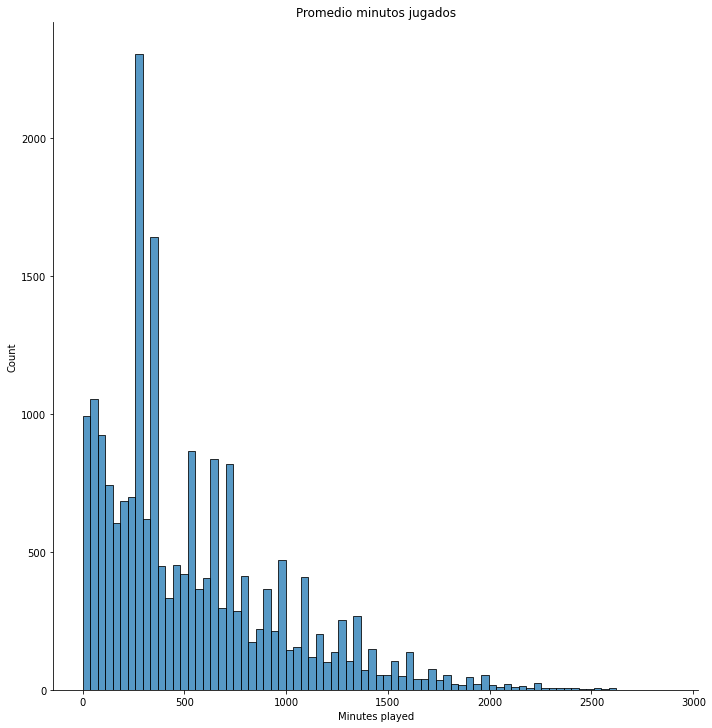

In [17]:
plt.figure(figsize=(14,6))
sns.displot(data, x='minutesPlayed',height=10)
plt.title('Promedio minutos jugados')
plt.xlabel('Minutes played')
plt.show()

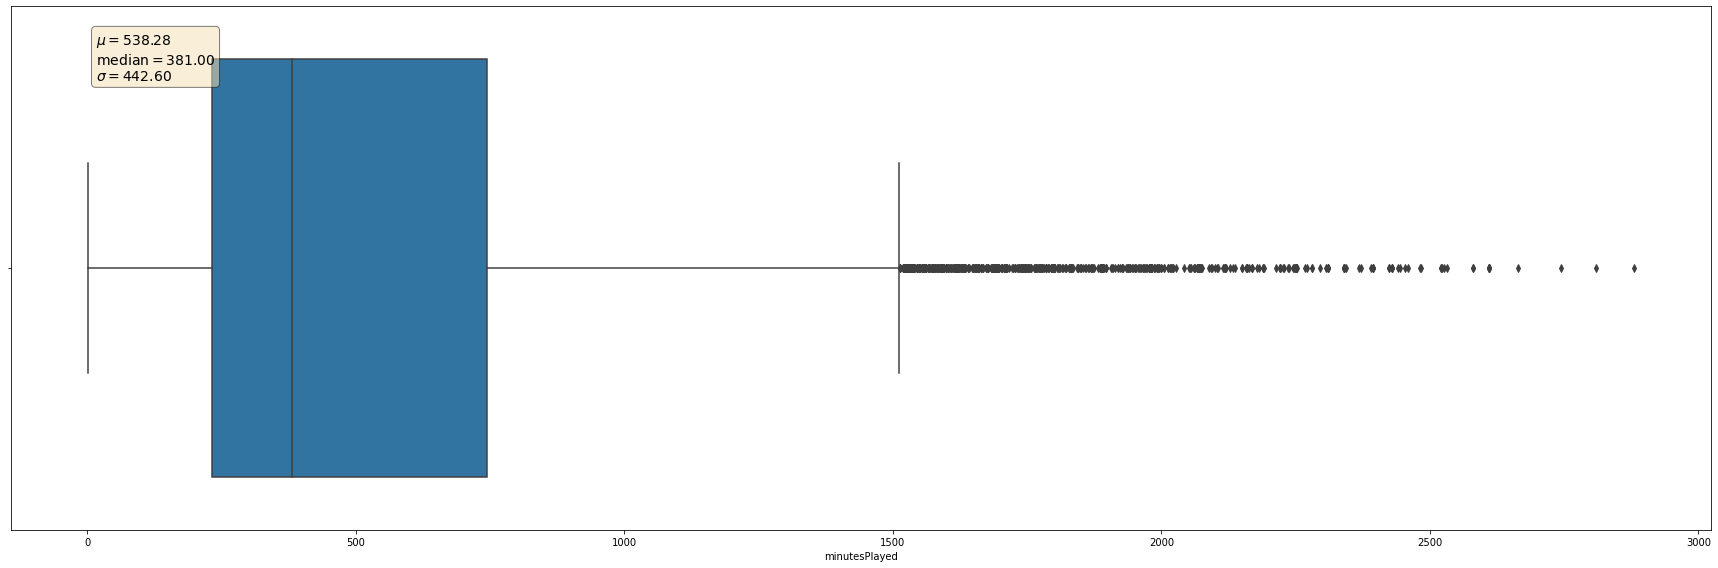

In [18]:
fig3, ax1 = plt.subplots(nrows = 1, ncols = 1)
fig3.set_size_inches(24,8)
mu = data['minutesPlayed'].mean()
median = data['minutesPlayed'].median()
sigma = data['minutesPlayed'].std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
sns.boxplot(x=data['minutesPlayed'],ax=ax1)
fig3.tight_layout()

Se nota una distribucion sesgada hacia la izquierda, donde la mediana es de 381 minutos y la media 538.28. Al ver todos los jugadores y sus estadisticas hay medidas en las cuales ciertos jugadores pueden haber jugado 5 minutos por ejemplo, y haber metido un gol por lo que en la medida "goles por tiro" tendra un 100% de efectividad. A la hora de fichar un jugador esta estadistica no nos sirve, necesitamos una cierta cantidad de minutos jugados para poder evaluar objetivamente y habiendo jugado solo minutos en toda una temporada no es suficiente. Por lo tanto lo que haremos sera aplicar otro filtro de minutos jugados, tomaremos a los jugadores que hayan jugado por lo menos la mediana de minutos, es decir, 4 partidos.

In [19]:
data.drop(data[data['minutesPlayed'] < 381].index, inplace = True)
print("Cantidad de filas y columnas",data.shape)
data.sort_values(by='minutesPlayed',ascending = True).head()

Cantidad de filas y columnas (10353, 43)


,player.id,player.marketValue,player.team.name,player.team.primaryUniqueTournament.name,player.name,position,player.country.name,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest
46522,881854.0,NaN,NaN,NaN,Alexis Souahy,D,Comoros,381.0,0.0,30.0,330.0,3.0,9.0,0.0,0.0,0.0,3.0,0.0,9.0,15.0,3.0,0.0,9.0,0.0,0.0,0.0,6.0,54.0,0.0,39.9,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,381.0,6.0,423.0,0.0,0.0
40829,603948.0,NaN,NaN,NaN,Liliu,M,Brazil,381.0,0.0,0.0,48.0,6.0,3.0,0.0,0.0,0.0,0.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,39.6,0.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,60.0,3.0,102.0,6.0,0.0
544,876345.0,960000.0,Burnley,Championship,Darko Churlinov,M,North Macedonia,381.0,0.0,3.0,84.0,10.0,6.0,0.0,1.0,0.0,2.0,5.0,30.0,20.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,59.0,0.0,52.1,0.0,0.0,4.0,11.0,16.0,7.0,6.0,3.0,107.0,4.0,229.0,4.0,6.0
12696,1050353.0,NaN,NaN,NaN,Maurício Garcez de Jesus,M,Brazil,381.0,0.0,6.0,54.0,12.0,6.0,0.0,0.0,3.0,3.0,0.0,33.0,21.0,3.0,3.0,6.0,0.0,3.0,0.0,0.0,84.0,0.0,39.9,0.0,0.0,3.0,0.0,27.0,3.0,9.0,3.0,84.0,3.0,183.0,3.0,9.0
40953,895107.0,NaN,NaN,NaN,Ryan Moon,M,South Africa,381.0,0.0,0.0,27.0,36.0,33.0,0.0,0.0,0.0,0.0,6.0,48.0,45.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,39.3,0.0,0.0,3.0,3.0,3.0,6.0,0.0,0.0,57.0,6.0,123.0,6.0,3.0


###**6.1.2.Valor mercado**

In [20]:
#Reemplazar los valores de 0 en nulos
data['player.marketValue'] = data['player.marketValue'].replace({0: np.nan})

In [21]:
print(data['player.marketValue'].isnull().sum())

6029


Tenemos el valor de 4324 jugadores de 10353. Crearemos un modelo que prediga los valores del mercado en función de otras variables. Haremos una imputacion predictiva.

In [22]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 42.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=cd25024c0425cf35cef8641c081fc51ba58d429d2b15561456043c01d0d37b06
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=abeed518407efa1cfd55ca0c08f774d84436e2b64b0bcf4f1b9429e441615672
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [23]:
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer(min_value=0)
traindatafill = mice_impute.fit_transform(data[['player.marketValue','minutesPlayed', 'accurateCross','accurateLongBalls', 'accuratePass', 'aerialLost', 'aerialWon','bigChanceCreated', 'bigChanceMissed', 'blockedScoringAttempt','challengeLost', 'dispossessed', 'duelLost', 'duelWon', 'fouls','goals', 'interceptionWon', 'keyPass', 'onTargetScoringAttempt','ownGoals', 'outfielderBlock', 'possessionLostCtrl', 'punches','rating', 'savedShotsFromInsideTheBox', 'saves', 'shotOffTarget',
       'totalClearance', 'totalContest', 'totalCross', 'totalLongBalls','totalOffside', 'totalPass', 'totalTackle', 'touches', 'wasFouled','wonContest']])
traindatafill= pd.DataFrame(traindatafill)

In [24]:
# Asi no haya valores negativos
traindatafill[traindatafill < 0] = 0

Text(0.5, 1.0, 'Valores modificados')

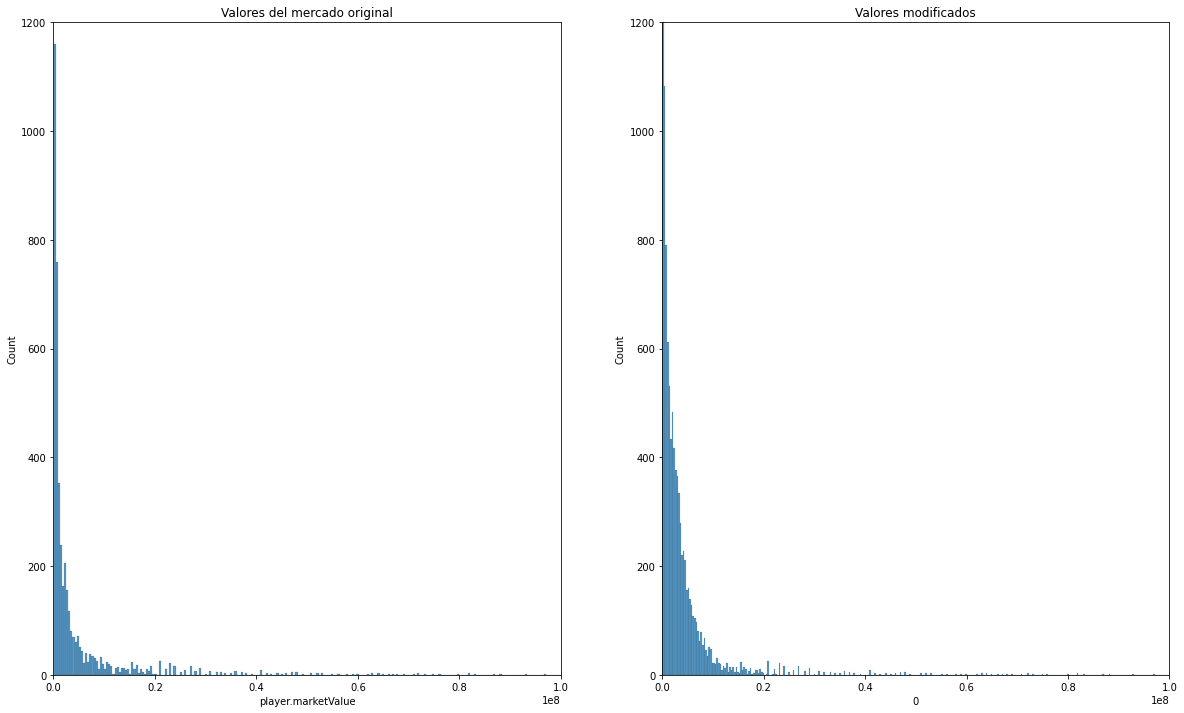

In [25]:
# Verificamos si cambiamos distribucion
plt.figure(figsize=(20,12)) 
plt.subplot(121)
sns.histplot(data['player.marketValue'])
plt.ylim([0,1200])
plt.xlim([0,100000000])
plt.title('Valores del mercado original')
plt.subplot(122)
sns.histplot(traindatafill[0])
plt.ylim([0,1200])
plt.xlim([0,100000000])
plt.title('Valores modificados')

In [26]:
data.reset_index(drop=True,inplace=True)
data['player.marketValue']=traindatafill[0]
data.drop(data[data['player.marketValue'] == 0].index, inplace = True)

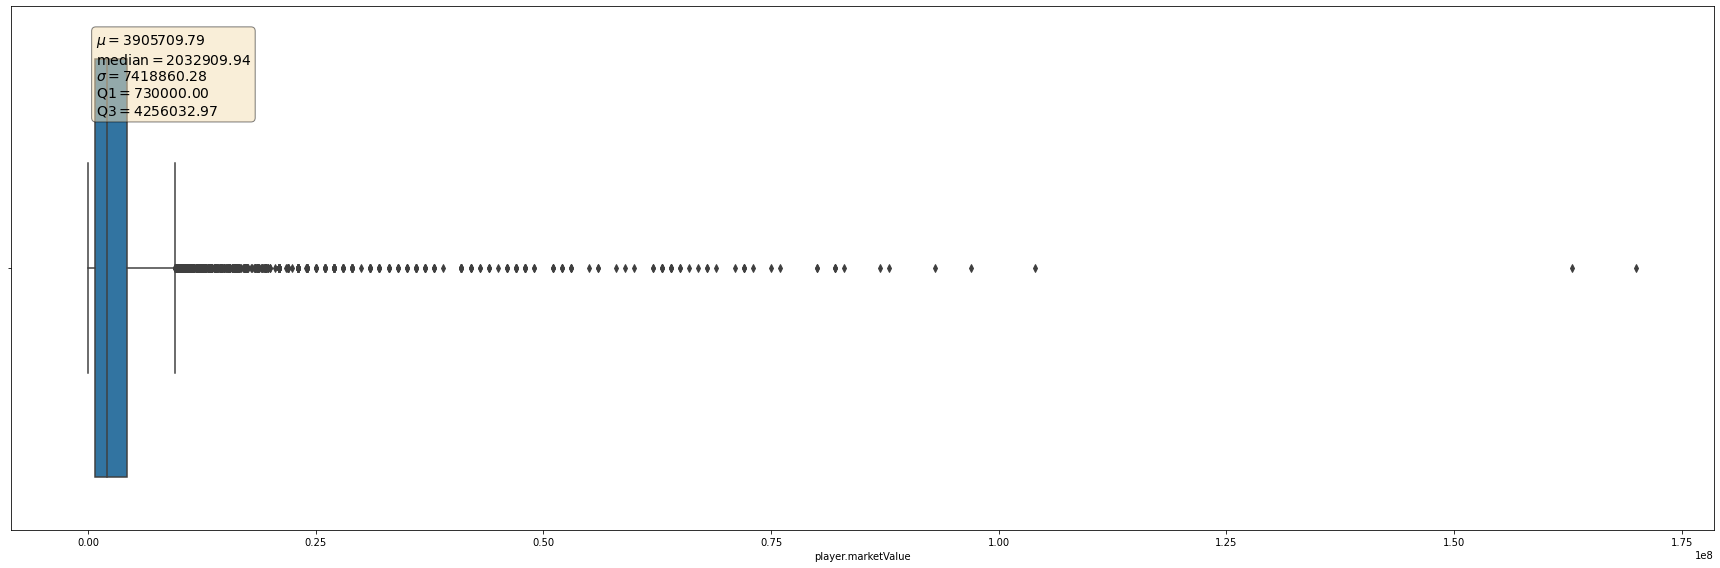

In [27]:
fig3, ax1 = plt.subplots(nrows = 1, ncols = 1)
fig3.set_size_inches(24,8)
mu = data['player.marketValue'].mean()
median = data['player.marketValue'].median()
sigma = data['player.marketValue'].std()
priqu = data['player.marketValue'].quantile(.25)
terqu = data['player.marketValue'].quantile(.75)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (sigma, ),
    r'$\mathrm{Q1}=%.2f$' % (priqu, ),
    r'$\mathrm{Q3}=%.2f$' % (terqu, )
    ))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
sns.boxplot(x=data['player.marketValue'],ax=ax1)
fig3.tight_layout()

In [28]:
max = data['player.marketValue'].quantile(.75) + (1.5 * (data['player.marketValue'].quantile(.75) - data['player.marketValue'].quantile(.25)))
outliers = data.drop(data[data['player.marketValue'] <= max].index)
print(outliers['player.id'].count())
max

677


9545082.427332759

In [29]:
data.shape

(9467, 43)

Observaciones de los datos obtenidos: 

*   El 75% cobran menos de €4.256.033
*   El 50% cobran entre €730.000 y €4.256.033
*   Podemos observar muchos valores atipicos los cuales son los mejores jugadores que cobran más. Subiendo el promedio del valor a €3.905.710
*   677 jugadores valen más de €9.051.462, donde hay valores mayores a €170.000.000





###**6.1.3.Correlaciones**


In [30]:
data = data[data['player.id'].notna()]

In [31]:
variables = data.drop(['player.id','player.team.name','player.team.primaryUniqueTournament.name', 'player.name', 'position','player.country.name'],axis=1)

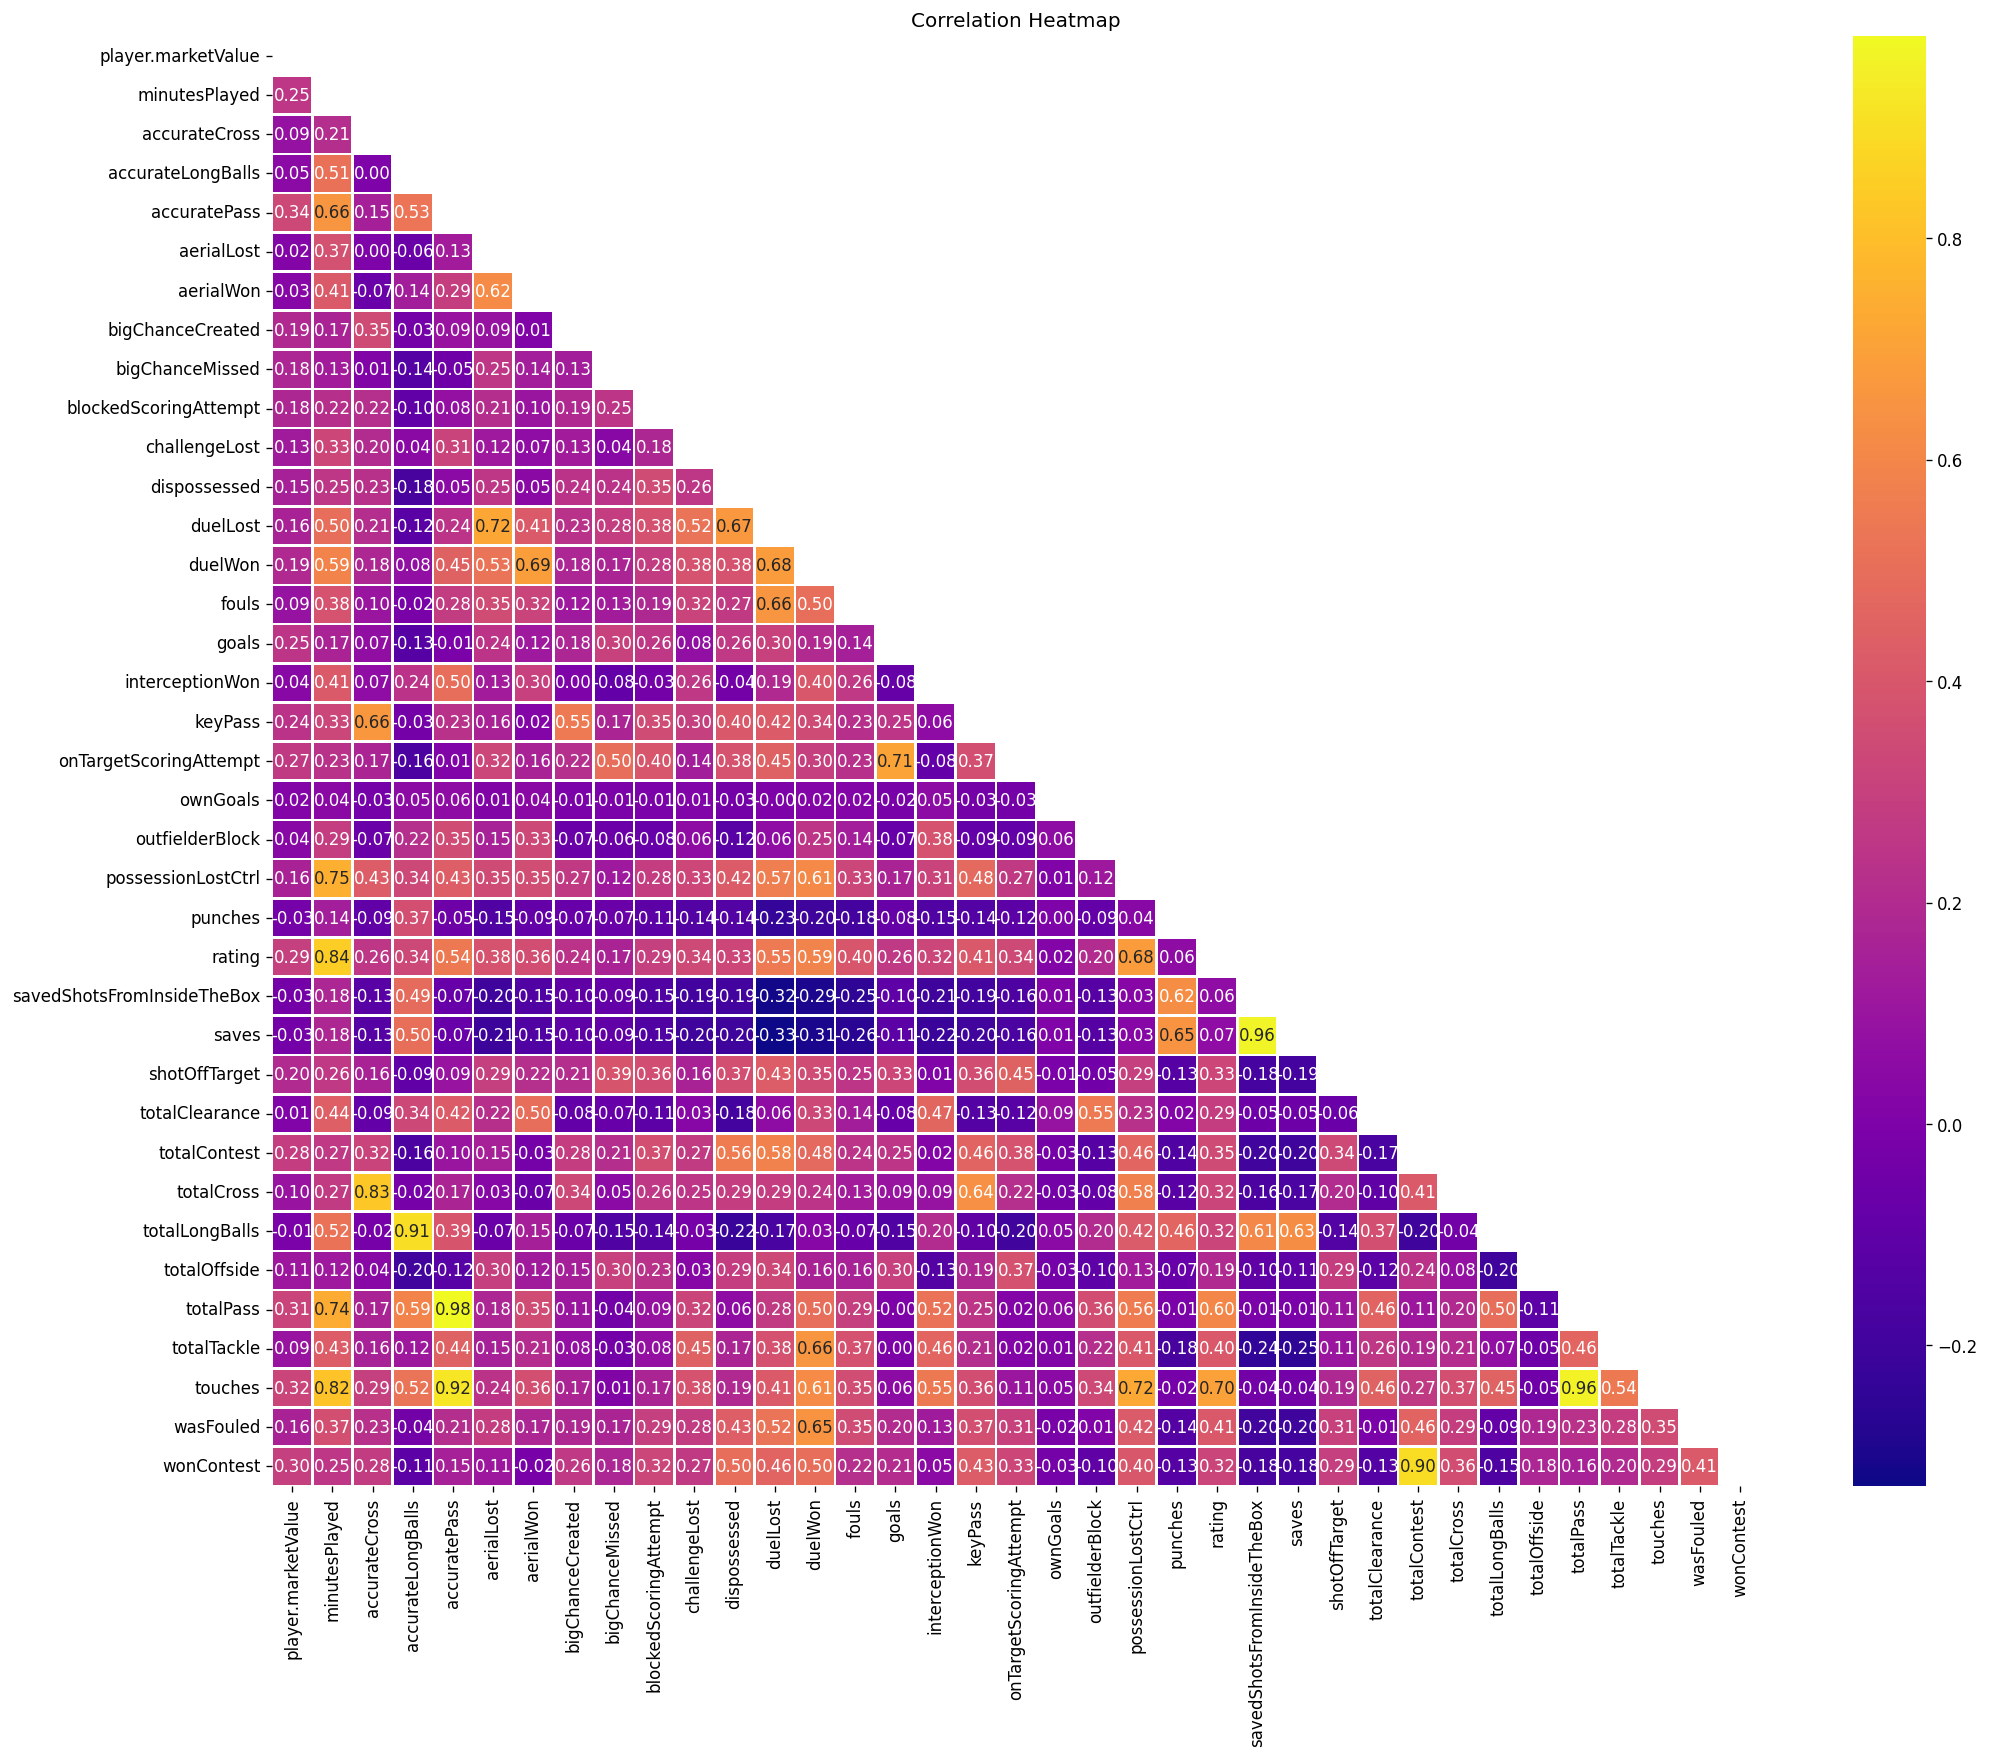

In [32]:
var=pd.DataFrame()
for j in variables:
  var[j] = (variables[j] - variables[j].mean()) / variables[j].std()
corrs_var=var.corr()
plt.figure(dpi = 120,figsize= (20,16))
mask = np.triu(np.ones_like(corrs_var,dtype = bool))
sns.heatmap(corrs_var,mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Algunas observaciones que podemos hacer:

*   Minutos jugados y la cantidad de veces que la toca un jugador tiene correlaciones altas con varias variables ya que a mayor tiempo jugado mas posibilidades de hacer más cosas como asi mientras más la toca el jugador dará un mayor numero de estadisticas.
*   La variable 'rating' que es el puntaje que se le puso al jugador por cada partido tiene altas relaciones con las que son 'total...', mientras más participe mejor puntaje tendra.
*   Atajadas y atajadas dentro del area no tienen correlacion con casi todas las demas variables ya que es una estadistica sola de los arqueros que son un porcentaje muy bajo de los jugadores totales.

*   El valor del jugador no tiene correlacion positiva alta con ninguna variable, no hay un factor clave a la hora de ponerle un precio al jugador
*   Elemento de la lista



En general se pueden ver muchas correlaciones altas y casi ninguna negativa solo la de los arqueros y los goles en contra. Por lo que podriamos decir que mientras des más pases, cabecies, paties al arco, mayor sera las posibilidades de generar más estadisticas.





###**6.1.4.Analisis por posicion**

In [33]:
#hacemos unas medidas y columnas para analizar
data['accurate_footwork'] = data['accuratePass'] + data['accurateLongBalls']
data['games_played'] = data['minutesPlayed'] / 90
data['bigchance'] = data['bigChanceCreated'] - data['bigChanceMissed']

####**Arqueros**

In [34]:
#Armo un dataframe de solo los arqueros para trabajar
arqueros = data.loc[data.loc[:,'position']=='G']

In [35]:
arqueros

,player.id,player.marketValue,player.team.name,player.team.primaryUniqueTournament.name,player.name,position,player.country.name,minutesPlayed,accurateCross,accurateLongBalls,accuratePass,aerialLost,aerialWon,bigChanceCreated,bigChanceMissed,blockedScoringAttempt,challengeLost,dispossessed,duelLost,duelWon,fouls,goals,interceptionWon,keyPass,onTargetScoringAttempt,ownGoals,outfielderBlock,possessionLostCtrl,punches,rating,savedShotsFromInsideTheBox,saves,shotOffTarget,totalClearance,totalContest,totalCross,totalLongBalls,totalOffside,totalPass,totalTackle,touches,wasFouled,wonContest,accurate_footwork,games_played,bigchance
0,791773.0,2.300000e+07,Real Sociedad,LaLiga,Álex Remiro,G,Spain,1260.0,0.0,46.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,114.0,0.0,91.0,30.0,40.0,0.0,0.0,0.0,0.0,160.0,0.0,284.0,0.0,384.0,0.0,0.0,216.0,14.0,0.0
14,360938.0,1.450000e+07,Sevilla,LaLiga,Bono,G,Morocco,1890.0,0.0,161.0,454.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.0,11.0,144.1,27.0,63.0,0.0,41.0,0.0,0.0,324.0,0.0,617.0,0.0,799.0,0.0,0.0,615.0,21.0,0.0
27,797291.0,2.400000e+07,Athletic Club,LaLiga,Unai Simón,G,Spain,1620.0,0.0,57.0,262.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,7.0,120.3,16.0,24.0,0.0,19.0,0.0,0.0,137.0,0.0,346.0,0.0,515.0,4.0,0.0,319.0,18.0,0.0
38,69768.0,6.400000e+07,AtlÃ©tico Madrid,LaLiga,Jan Oblak,G,Slovenia,1080.0,0.0,70.0,184.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,80.9,17.0,30.0,0.0,0.0,0.0,0.0,149.0,0.0,264.0,0.0,362.0,4.0,0.0,254.0,12.0,0.0
48,88625.0,4.700000e+07,Barcelona,LaLiga,Marc-André ter Stegen,G,Germany,2250.0,0.0,67.0,647.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,55.0,10.0,173.8,24.0,65.0,4.0,36.0,0.0,0.0,101.0,0.0,699.0,0.0,986.0,3.0,0.0,714.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,31828.0,1.750976e+06,NaN,NaN,Raúl Fernández,G,Spain,540.0,0.0,15.0,126.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,40.5,3.0,15.0,0.0,6.0,0.0,0.0,48.0,0.0,159.0,0.0,210.0,0.0,0.0,141.0,6.0,0.0
10299,38156.0,1.286055e+06,NaN,NaN,José Escobar,G,Colombia,540.0,0.0,18.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,3.0,36.9,6.0,6.0,0.0,9.0,3.0,0.0,39.0,0.0,129.0,0.0,189.0,0.0,3.0,126.0,6.0,0.0
10317,204264.0,4.279368e+05,NaN,NaN,Cody Cropper,G,USA,540.0,0.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,6.0,38.4,15.0,21.0,0.0,15.0,0.0,0.0,99.0,0.0,144.0,0.0,231.0,0.0,0.0,111.0,6.0,0.0
10318,48990.0,1.489042e+05,NaN,NaN,Tyler Deric,G,USA,540.0,0.0,24.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,39.9,3.0,9.0,0.0,9.0,0.0,0.0,93.0,0.0,162.0,0.0,228.0,0.0,0.0,114.0,6.0,0.0


In [36]:
saves = arqueros[['player.name','saves']].sort_values('saves',ascending =False).head(10)
inthebox = arqueros[['player.name','savedShotsFromInsideTheBox']].sort_values('savedShotsFromInsideTheBox',ascending =False).head(10)
footwork = arqueros[['player.name','accurate_footwork']].sort_values('accurate_footwork',ascending =False).head(10)
aerialgame = arqueros[['player.name','aerialWon']].sort_values('aerialWon',ascending =False).head(10)

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=2,subplot_titles=('Atajadas', 'Atajadas dentro del area','Duelos aereos ganados','Pases y pelotazos correctos'),horizontal_spacing = 0.12,vertical_spacing = 0.12)

fig.add_trace(go.Bar(y=saves['player.name'], x=saves['saves'], orientation='h'), row=1, col=1)
fig.add_trace(go.Bar( y=inthebox['player.name'], x=inthebox['savedShotsFromInsideTheBox'], orientation='h'), row=1, col=2)
fig.add_trace(go.Bar( y=aerialgame['player.name'], x=aerialgame['aerialWon'], orientation='h'), row=2, col=1)
fig.add_trace(go.Bar( y=footwork['player.name'], x=footwork['accurate_footwork'], orientation='h'), row=2, col=2)

fig.update_layout(title_text='<b> Top arqueros estadisticas<b>', titlefont={'size':28},title_x=0.5, showlegend=False,autosize=False,width=1300,height=1200,template='ggplot2',paper_bgcolor='lightgray',plot_bgcolor='lightgray',)
fig.show()

A la hora de ver los arqueros su cualidad mas importante es que atajen, valga la redundancia. Es decir que cuando le patien al arco eviten que la pelota entre. Si bien mas atajadas es mejor eso no significa que Gavin Bazunu sea el mejor arquero, porque puede ser de un equipo chico y que le lleguen muchas veces y tenga la oportunidad de atajar, en cambio, a los arqueros de equipos grandes le llegan menos porque tiene un mejor equipo que defienda. Una gran medida seria tiros atajados por tiros al arco para poder valorarlos, igualmente no se le puede sacar merito a Gavin que hizo mas de 100 atajadas en la temporada.

Luego hay dos aspectos muy importantes a la hora de elegir arquero, algunos entrenadores les importa mucho que jueguen bien con los pies a la hora de salir jugando para generar superioridad y tener una salida mas limpia. Ademas de que pueden generar ocasiones manifiestas de gol con un buen pelotazo a los delanteros en un contrataque.

Por el otro lado se encuentra el juego aereo, cortar centros o agarrarla en el aire cuando queda un rebote. Un arquero que corte muchos centros, saca la posibilidad a los delanteros que hagan gol y ademas puede generar contra ataques. Siempre sera un plus tener un buen juego aereo, porque puede ser que salga muchas veces a cortar y que no la agarre ni la toque y el arco se queda sin arquero en ese momento.


####**Defensores**

In [38]:
#Armo un dataframe de solo los defensores para trabajar
defensores = data.loc[df5.loc[:,'position']=='D']

In [39]:
keypass = defensores[['player.name','keyPass']].sort_values('keyPass',ascending =False).head(10)
interceptions = defensores[['player.name','interceptionWon']].sort_values('interceptionWon',ascending =False).head(10)
goals = defensores[['player.name','goals']].sort_values('goals',ascending =False).head(10)
duelswon = defensores[['player.name','duelWon']].sort_values('duelWon',ascending =False).head(10)
cross = defensores[['player.name','accurateCross']].sort_values('accurateCross',ascending =False).head(10)
bigChanceCreated = defensores[['player.name','bigChanceCreated']].sort_values('bigChanceCreated',ascending =False).head(10)
footwork = defensores[['player.name','accurate_footwork']].sort_values('accurate_footwork',ascending =False).head(10)
aerialwon = defensores[['player.name','aerialWon']].sort_values('aerialWon',ascending =False).head(10)

In [40]:
fig = make_subplots(rows=4, cols=2,subplot_titles=('Goles', 'Intercepciones','Cruces','Duelos ganados',
                    'Pases clave', 'Gran chance creada','Duelos aereos ganados', 'Pases y pelotazos correctos'),horizontal_spacing = 0.12,vertical_spacing = 0.075)

fig.add_trace(go.Bar(y=interceptions['player.name'], x=interceptions['interceptionWon'], orientation='h'), row=1, col=2)
fig.add_trace(go.Bar( y=cross['player.name'], x=cross['accurateCross'], orientation='h'), row=2, col=1)
fig.add_trace(go.Bar( y=keypass['player.name'], x=keypass['keyPass'],orientation='h'), row=3, col=1)
fig.add_trace(go.Bar( y=aerialwon['player.name'], x=aerialwon['aerialWon'], orientation='h'), row=4, col=1)
fig.add_trace(go.Bar( y=goals['player.name'], x=goals['goals'],orientation='h'), row=1, col=1)
fig.add_trace(go.Bar( y=duelswon['player.name'], x=duelswon['duelWon'], orientation='h'), row=2, col=2)
fig.add_trace(go.Bar( y=bigChanceCreated['player.name'], x=bigChanceCreated['bigChanceCreated'], orientation='h'), row=3, col=2)
fig.add_trace(go.Bar( y=footwork['player.name'], x=footwork['accurate_footwork'], orientation='h'), row=4, col=2)

fig.update_layout(title_text='<b> Top defensores estadisticas<b>', titlefont={'size':28},title_x=0.5, showlegend=False,autosize=False,width=1300,height=1200,template='ggplot2',paper_bgcolor='lightgray',plot_bgcolor='lightgray',)
fig.show()

A la hora de pensar en defensores pensamos en jugadores fuertes, capaces de ir al piso, chocar, cabecear, faltas, entre tantas imagenes que se nos viene a la cabeza. Estamos todos de acuerdo que la tarea principal del defensor es ser fuerte en esos aspectos y es su tarea principal, no me sirve un central que te ponga muy buenos pelotazos al espacio pero cuando lo atacan lo pasan por todos lados. Claramente lo primero que hay que ver es si sabe defender, la cantidad de intercepciones, cruces, duelos ganados y duelos aereos ganados. 

Por el otro lado tenemos el lado mas tecnico y ofensivo del defensor, si da buenos pases, pone buenos pelotazos, tira buenos centros, mete pases filtrados o claves al momento de pasar al ataque y obviamente su capacidad goleadora. Hay varios defensores que se destacaron mas por su labor en el area rival que en la propia, como por ejemplo, Sergio Ramos o Passarella que fueron grandes goleadores. 

La eleccion depende al estilo de juego del equipo, se puede ser un equipo compacto que juegan todo a los pelotazos arriba y a buscar la segunda pelota por lo que no haria gran falta un defensor con buen pie. Y otros equipos como podrian ser los grandes, que como estan constantemente al ataque y no pueden penetrar el bloque defensivo, un buen pase del defensor seria una gran herramienta.





####**Mediocampitas**

In [41]:
#Armo un dataframe de solo los mediocampistas para trabajar
mediocampistas = data.loc[df5.loc[:,'position']=='M']

In [42]:
keypass = mediocampistas[['player.name','keyPass']].sort_values('keyPass',ascending =False).head(10)
touches = mediocampistas[['player.name','touches']].sort_values('touches',ascending =False).head(10)
goals = mediocampistas[['player.name','goals']].sort_values('goals',ascending =False).head(10)
duelswon = mediocampistas[['player.name','duelWon']].sort_values('duelWon',ascending =False).head(10)
cross = mediocampistas[['player.name','accurateCross']].sort_values('accurateCross',ascending =False).head(10)
bigChanceCreated = mediocampistas[['player.name','bigChanceCreated']].sort_values('bigChanceCreated',ascending =False).head(10)
footwork = mediocampistas[['player.name','accurate_footwork']].sort_values('accurate_footwork',ascending =False).head(10)
agressive = mediocampistas[['player.name','fouls']].sort_values('fouls',ascending =False).head(10)

In [43]:
fig = make_subplots(rows=4, cols=2,subplot_titles=('Gran chances creadas', 'Pases clave','Goles','Pases y pelotazos correctos',
                    'Duelos ganados', 'Toques','Cruces efectivos', 'Foules cometidos'),horizontal_spacing = 0.12,vertical_spacing = 0.075)

fig.add_trace(go.Bar(y=keypass['player.name'], x=keypass['keyPass'], orientation='h'), row=1, col=2)
fig.add_trace(go.Bar( y=goals['player.name'], x=goals['goals'], orientation='h'), row=2, col=1)
fig.add_trace(go.Bar( y=duelswon['player.name'], x=duelswon['duelWon'],orientation='h'), row=3, col=1)
fig.add_trace(go.Bar( y=cross['player.name'], x=cross['accurateCross'], orientation='h'), row=4, col=1)
fig.add_trace(go.Bar( y=bigChanceCreated['player.name'], x=bigChanceCreated['bigChanceCreated'],orientation='h'), row=1, col=1)
fig.add_trace(go.Bar( y=footwork['player.name'], x=footwork['accurate_footwork'], orientation='h'), row=2, col=2)
fig.add_trace(go.Bar( y=touches['player.name'], x=touches['touches'], orientation='h'), row=3, col=2)
fig.add_trace(go.Bar( y=agressive['player.name'], x=agressive['fouls'], orientation='h'), row=4, col=2)

fig.update_layout(title_text='<b> Top mediocampistas estadisticas<b>', titlefont={'size':28},title_x=0.5, showlegend=False,autosize=False,width=1300,height=1200,template='ggplot2',paper_bgcolor='lightgray',plot_bgcolor='lightgray',)
fig.show()

Los mediocampistas son el nexo entre la defensa y el ataque, son el motorsito del equipo. Dictan el ritmo de juego, ayudan a sus compañeros defendiendo o atacando dependiendo de la situacion del equipo. Tienen que ser habilidosos para poder poner un pase ofensivo o para detectar peligro a la hora de defender antes que los defensores. Todos los grande equipos tienen mediocampistas de clase mundial.

Podemos observar por ejemplo que Sergio Busquets cumple con la tarea de ser el centro del equipo por la cantidad de toques y la cantidad de pases y pelotazos correctos sacandole mas de 500 al segundo. Con esas estadisticas podemos ver que es un jugador clave para el equipo y que casi todas las pelotas pasan por él.

Despues podemos observar que Jadon Sancho y Dušan Tadić son jugadores muy capaces a la hora de tomar desiciones en 3/4 de cancha ya que generaron gran cantidades de peligro como pases claves, estas estadisticas son interesantes si un equipo ta buscando un jugador ofensivo y *punzante* a la hora de generar peligro.



####**Delanteros**

In [44]:
#Armo un dataframe de solo los delanteros para trabajar
delanteros = data.loc[df5.loc[:,'position']=='F']

In [45]:
delanteros['goalspershot'] = (delanteros['goals'] / (delanteros['shotOffTarget'] + delanteros['onTargetScoringAttempt'])).round(3)
delanteros['goalsperminute'] = (delanteros['goals'] / delanteros['minutesPlayed']).round(3)

In [46]:
goalspershot = delanteros[['player.name','goalspershot']].sort_values('goalspershot',ascending =False).head(10)
goalsperminute = delanteros[['player.name','goalsperminute']].sort_values('goalsperminute',ascending =False).head(10)
keypass = delanteros[['player.name','keyPass']].sort_values('keyPass',ascending =False).head(10)
onTargetScoringAttempt = delanteros[['player.name','onTargetScoringAttempt']].sort_values('onTargetScoringAttempt',ascending =False).head(10)
goals = delanteros[['player.name','goals']].sort_values('goals',ascending =False).head(10)
duelswon = delanteros[['player.name','duelWon']].sort_values('duelWon',ascending =False).head(10)
bigchance = delanteros[['player.name','bigchance']].sort_values('bigchance',ascending =False).head(10)
footwork = delanteros[['player.name','accurate_footwork']].sort_values('accurate_footwork',ascending =False).head(10)
aerialwon = delanteros[['player.name','aerialWon']].sort_values('aerialWon',ascending =False).head(10)
wasfouled = delanteros[['player.name','wasFouled']].sort_values('wasFouled',ascending =False).head(10)

In [47]:
fig = make_subplots(rows=3, cols=3,subplot_titles=('Goles', 'Goles por tiro','Goles por minuto','Duelos ganados',
                    'Pases clave', 'Gran chance creada','Duelos aereos ganados', 'Pases y pelotazos efectivos', 'Foules recibidos'),horizontal_spacing = 0.12,vertical_spacing = 0.075)

fig.add_trace(go.Bar(y=goalspershot['player.name'], x=goalspershot['goalspershot'], orientation='h'), row=1, col=2)
fig.add_trace(go.Bar( y=goalsperminute['player.name'], x=goalsperminute['goalsperminute'], orientation='h'), row=1, col=3)
fig.add_trace(go.Bar( y=keypass['player.name'], x=keypass['keyPass'],orientation='h'), row=2, col=2)
fig.add_trace(go.Bar( y=aerialwon['player.name'], x=aerialwon['aerialWon'], orientation='h'), row=3, col=1)
fig.add_trace(go.Bar( y=goals['player.name'], x=goals['goals'],orientation='h'), row=1, col=1)
fig.add_trace(go.Bar( y=duelswon['player.name'], x=duelswon['duelWon'], orientation='h'), row=2, col=1)
fig.add_trace(go.Bar( y=bigchance['player.name'], x=bigchance['bigchance'], orientation='h'), row=2, col=3)
fig.add_trace(go.Bar( y=footwork['player.name'], x=footwork['accurate_footwork'], orientation='h'), row=3, col=2)
fig.add_trace(go.Bar( y=wasfouled['player.name'], x=wasfouled['wasFouled'], orientation='h'), row=3, col=3)

# fig.update_traces(marker_color= ['rgb(110,102,250)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)', 'rgb(210,202,82)',], marker_line_color='rgb(8,48,107)', marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b> Top delanteros estadisticas<b>', titlefont={'size':28},title_x=0.5, showlegend=False,autosize=False,width=1300,height=1200,template='ggplot2',paper_bgcolor='lightgray',plot_bgcolor='lightgray',)
fig.show()

Los delanteros son los que hacen generalmente la mayoria de goles, los que gracias a ellos se ganan partidos, que se llevan las fotos y generalmente todos los premios, no por algo los ultimos 15 balones de oro (premio al mejor jugador del mundo anualmente) 12 lo gano un delantero. Por todo esto es que estos jugadores son más cotizados en el mercado que otras posiciones.

Cuando vemos la data, podemos analizar distintas variables entre tiros, el porcentaje de tiros q van al arco, del total de tiros cuantos terminan en gol, pases claves porque por mas que hagan goles tambien pueden dar asistencias o contribuir a la hora de generar juego y bueno sobre todo se analizan los goles.

Podemos notar cuando hacemos un paneo general a las estadisticas que Messi aparece en muchos top 10's, lo que demuestra el gran jugador que es. No solo en goles, sino que en pases y pelotazos correctos tiene 1900. Esta cifra nos llama la atencion porque, primero que es una barbaridad para ser delantero, el cual generalmente no tiene mucho contacto con la pelota ya que cuando llega tiene que patear y ademas es el septimo jugador con mejores numeros en esta cualidad entre todos.

Claramente no cualquier equipo puede fichar a Messi ya que eso consistiria en millones de Euros, pero estas estadisticas estan buenas para ver la cantidad de jugadores goleadores, que ganan duelos, que crean chances de gol que hay y que capaz que no brillan en los medios por que no *venden* o porque nadie los descubrio.

---



# 7.Modelo 

##7.1.Clasificacion con K-Mean

In [48]:
val_rat = data[['player.marketValue','rating']]

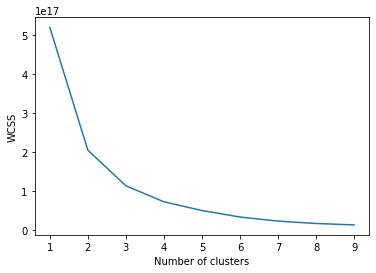

In [49]:
# Metodo del Codo para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(val_rat)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


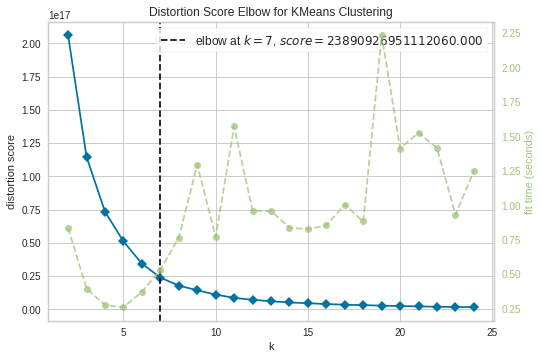

In [51]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,25))
visualizer.fit(val_rat)  
visualizer.show()

Generamos los clusters para valores de 2 a 25 y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 6,corroboramos y vemos que, para este caso práctico, el número óptimo de clusters será de 7.

In [52]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(val_rat)

In [53]:
y_kmeans

array([4, 0, 4, ..., 1, 1, 1], dtype=int32)

In [54]:
data['label']=y_kmeans

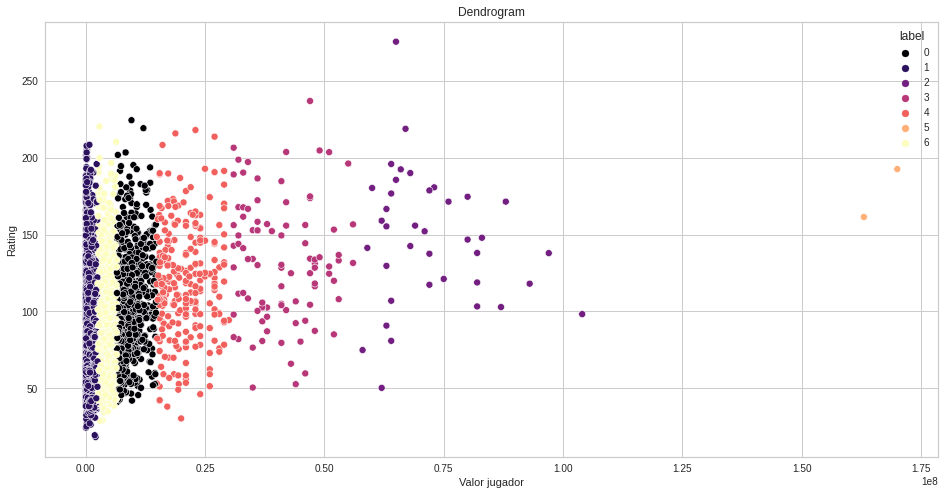

In [55]:
plt.figure(1, figsize = (16 ,8))
sns.scatterplot(x='player.marketValue',y='rating',data=data,palette='magma',hue='label')
plt.title('Dendrogram')
plt.xlabel('Valor jugador')
plt.ylabel('Rating')
plt.show()

Como nuestro objetivo es encontrar jugadores para nuestros clientes los cuales son clubes de bajos recursos o que tienen el poder adquisitivo pero buscan hacer inversiones de bajo costo, podemos eliminar los jugadores de los labels 1, 3 y 5.


In [56]:
data = data[data.label.isin([0,1,4,6])]

##7.3.Eleccion de las mejores variables

Con los metodos de feature selection seleccionaremos las variables que mejor definan al rating, valor que se le puso a cada jugador en cada partido. Para cada posicion las variables seran distintas, ya que no le interesan puntuar a un arquero por la cantidad de goles que haga o a un delantero por cuantos quites hizo.

Los procesos que usaremos seran "Backward selection", "Forward selection" y "Stepwise". Estos se basan en un algoritmo de aprendizaje automatico que lo encajaremos en nuestro dataframe con las habilidades y con los objetivos. Siguen un enfoque de búsqueda codiciosa al evaluar todas las posibles combinaciones de habilidades contra el criterio de evaluación. Finalmente, selecciona la combinación de características que da el resultados óptimos para el algoritmo de aprendizaje automático especificado.

In [57]:
df = data.copy()

In [58]:
# Separado en dataframes de acuerdo a la posicion
df_arq = df.loc[df.loc[:,'position']=='G']
df_def = df.loc[df.loc[:,'position']=='D']
df_med = df.loc[df.loc[:,'position']=='M']
df_del = df.loc[df.loc[:,'position']=='F']

In [59]:
# Separado de variables
X1 = df_arq.drop(['player.id', 'player.marketValue', 'player.team.name','player.team.primaryUniqueTournament.name', 'player.name', 'position','player.country.name', 'minutesPlayed','rating','label'],axis=1)
X2 = df_def.drop(['player.id', 'player.marketValue', 'player.team.name','player.team.primaryUniqueTournament.name', 'player.name', 'position','player.country.name', 'minutesPlayed','rating','label'],axis=1)
X3 = df_med.drop(['player.id', 'player.marketValue', 'player.team.name','player.team.primaryUniqueTournament.name', 'player.name', 'position','player.country.name', 'minutesPlayed','rating','label'],axis=1)
X4 = df_del.drop(['player.id', 'player.marketValue', 'player.team.name','player.team.primaryUniqueTournament.name', 'player.name', 'position','player.country.name', 'minutesPlayed','rating','label'],axis=1)
Y1 = df_arq['rating']
Y2 = df_def['rating']
Y3 = df_med['rating']
Y4 = df_del['rating']

In [60]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [61]:
y_for_1 = forward_selection(data=X1,target=Y1,significance_level=0.05)
y_for_2 = forward_selection(data=X2,target=Y2,significance_level=0.05)
y_for_3 = forward_selection(data=X3,target=Y3,significance_level=0.05)
y_for_4 = forward_selection(data=X4,target=Y4,significance_level=0.05)

In [62]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [63]:
y_back_1 = backward_elimination(X1,Y1,significance_level=0.05)
y_back_2 = backward_elimination(X2,Y2,significance_level=0.05)
y_back_3 = backward_elimination(X3,Y3,significance_level=0.05)
y_back_4 = backward_elimination(X4,Y4,significance_level=0.05)

In [64]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [65]:
y_step_1 = stepwise_selection(X1,Y1)
y_step_2 = stepwise_selection(X2,Y2)
y_step_3 = stepwise_selection(X3,Y3)
y_step_4 = stepwise_selection(X4,Y4)

In [66]:
# creamos una sola lista con las variables de los 3 metodos
var_arq = list(set(y_back_1 + y_for_1 + y_step_1))
var_def = list(set(y_back_2 + y_for_2 + y_step_2))
var_med = list(set(y_back_3 + y_for_3 + y_step_3))
var_del = list(set(y_back_4 + y_for_4 + y_step_4))

In [67]:
df_val1 = X1[var_arq]
df_val2 = X2[var_def]
df_val3 = X3[var_med]
df_val4 = X4[var_del]

##7.4.Eleccion del algoritmo 

Elijo los mejores algoritmos para cada posicion

In [68]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [70]:
x1 = df_val1.copy()
y1 = Y1.copy()
x2 = df_val2.copy()
y2 = Y2.copy()
x3 = df_val3.copy()
y3 = Y3.copy()
x4 = df_val4.copy()
y4 = Y4.copy()

In [71]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3)

In [72]:
from lazypredict.Supervised import LazyRegressor

In [73]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models1,predictions = reg.fit(X_train1, X_test1, y_train1, y_test1)
models1

 98%|█████████▊| 41/42 [00:12<00:00,  2.95it/s]

[01:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:12<00:00,  3.40it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,0.97,0.97,5.79,0.02
SGDRegressor,0.97,0.97,5.79,0.07
Ridge,0.97,0.97,5.80,0.01
RidgeCV,0.97,0.97,5.80,0.03
BayesianRidge,0.97,0.97,5.80,0.01
Lars,0.97,0.97,5.80,0.01
LinearRegression,0.97,0.97,5.80,0.01
TransformedTargetRegressor,0.97,0.97,5.80,0.01
RANSACRegressor,0.97,0.97,5.80,0.03


In [74]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models2,predictions = reg.fit(X_train2, X_test2, y_train2, y_test2)
models2

 90%|█████████ | 38/42 [03:42<00:40, 10.14s/it]

[01:16:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [03:42<00:00,  5.30s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.84,0.85,12.39,0.98
RandomForestRegressor,0.84,0.84,12.42,1.77
HistGradientBoostingRegressor,0.84,0.84,12.50,6.51
XGBRegressor,0.84,0.84,12.50,0.26
LGBMRegressor,0.84,0.84,12.54,0.18
GradientBoostingRegressor,0.84,0.84,12.63,0.73
BaggingRegressor,0.83,0.83,13.02,0.34
RidgeCV,0.81,0.81,13.58,0.03
BayesianRidge,0.81,0.81,13.58,0.03


In [75]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models3,predictions = reg.fit(X_train3, X_test3, y_train3, y_test3)
models3

 90%|█████████ | 38/42 [05:25<01:00, 15.13s/it]

[01:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [05:25<00:00,  7.76s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.73,0.74,17.25,2.51
ExtraTreesRegressor,0.73,0.73,17.30,1.28
XGBRegressor,0.73,0.73,17.39,0.26
HistGradientBoostingRegressor,0.73,0.73,17.42,0.43
GradientBoostingRegressor,0.72,0.73,17.45,0.70
LGBMRegressor,0.72,0.73,17.49,0.19
BaggingRegressor,0.72,0.72,17.59,0.26
LassoCV,0.72,0.72,17.68,0.14
LassoLarsCV,0.72,0.72,17.68,0.07


In [76]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models4,predictions = reg.fit(X_train4, X_test4, y_train4, y_test4)
models4

 98%|█████████▊| 41/42 [00:58<00:01,  1.51s/it]

[01:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:58<00:00,  1.40s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNetCV,0.62,0.63,19.71,0.17
BayesianRidge,0.61,0.63,19.74,0.01
Ridge,0.61,0.63,19.75,0.02
RidgeCV,0.61,0.63,19.75,0.02
LassoLarsCV,0.61,0.63,19.75,0.10
LinearRegression,0.61,0.63,19.75,0.01
TransformedTargetRegressor,0.61,0.63,19.75,0.02
LassoLarsIC,0.61,0.63,19.76,0.03
LassoCV,0.61,0.63,19.76,0.17


##7.5.Desarrollo y validacion del algoritmo

###7.5.1.Arquero

In [77]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train1,y_train1)
y_pred1 = ridge.predict(X_test1)
print('Ridge score: ',ridge.score(X_test1,y_test1))

Ridge score:  0.9630293180940025


In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
print('R2 es:', r2_score(y_true=y_test1, y_pred=y_pred1).round(3))
print('MSE es:', mean_squared_error(y_true=y_test1, y_pred=y_pred1).round(3))
print('RMSE es:', np.sqrt(mean_squared_error(y_true=y_test1, y_pred=y_pred1)).round(3))
print('MAE es:', mean_absolute_error(y_true=y_test1, y_pred=y_pred1).round(3))
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test1, y_pred=y_pred1).round(3))
print('MedAE es:', median_absolute_error(y_true=y_test1, y_pred=y_pred1).round(3))
print('MaxError es:', max_error(y_true=y_test1, y_pred=y_pred1).round(3))

R2 es: 0.963
MSE es: 41.446
RMSE es: 6.438
MAE es: 4.831
MAPE es: 0.069
MedAE es: 3.918
MaxError es: 27.292


###7.5.2.Defensor


In [80]:
import xgboost as xg

In [81]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 42, max_depth=10, eta=0.01, 
                        subsample=0.7, colsample_bytree=0.8)
# Ajustar el modelo
xgb_r.fit(X_train2, y_train2)

XGBRegressor(colsample_bytree=0.8, eta=0.01, max_depth=10,
             objective='reg:squarederror', seed=42, subsample=0.7)

In [82]:
y_pred2=xgb_r.predict(X_test2)

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
print('R2 es:', r2_score(y_true=y_test2, y_pred=y_pred2).round(3))
print('MSE es:', mean_squared_error(y_true=y_test2, y_pred=y_pred2).round(3))
print('RMSE es:', np.sqrt(mean_squared_error(y_true=y_test2, y_pred=y_pred2)).round(3))
print('MAE es:', mean_absolute_error(y_true=y_test2, y_pred=y_pred2).round(3))
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test2, y_pred=y_pred2).round(3))
print('MedAE es:', median_absolute_error(y_true=y_test2, y_pred=y_pred2).round(3))
print('MaxError es:', max_error(y_true=y_test2, y_pred=y_pred2).round(3))

R2 es: 0.841
MSE es: 157.992
RMSE es: 12.569
MAE es: 8.35
MAPE es: 0.107
MedAE es: 5.634
MaxError es: 75.681


###7.5.3.Mediocampista

In [84]:
# GradientBoostingRegressor	
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train3, y_train3)
y_pred3 = gbr.predict(X_test3)
gbr.score(X_test3, y_test3)

0.7293024195425941

In [85]:
print('R2 es:', r2_score(y_true=y_test3, y_pred=y_pred3).round(3))
print('MSE es:', mean_squared_error(y_true=y_test3, y_pred=y_pred3).round(3))
print('RMSE es:', np.sqrt(mean_squared_error(y_true=y_test3, y_pred=y_pred3)).round(3))
print('MAE es:', mean_absolute_error(y_true=y_test3, y_pred=y_pred3).round(3))
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test3, y_pred=y_pred3).round(3))
print('MedAE es:', median_absolute_error(y_true=y_test3, y_pred=y_pred3).round(3))
print('MaxError es:', max_error(y_true=y_test3, y_pred=y_pred3).round(3))

R2 es: 0.729
MSE es: 304.508
RMSE es: 17.45
MAE es: 13.335
MAPE es: 0.173
MedAE es: 10.926
MaxError es: 101.042


###7.5.4.Delantero

In [86]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train4,y_train4)
y_pred4 = ridge.predict(X_test4)
print('Ridge score: ',ridge.score(X_test4,y_test4))

Ridge score:  0.6268338325174266


In [87]:
print('R2 es:', r2_score(y_true=y_test4, y_pred=y_pred4).round(3))
print('MSE es:', mean_squared_error(y_true=y_test4, y_pred=y_pred4).round(3))
print('RMSE es:', np.sqrt(mean_squared_error(y_true=y_test4, y_pred=y_pred4)).round(3))
print('MAE es:', mean_absolute_error(y_true=y_test4, y_pred=y_pred4).round(3))
print('MAPE es:', mean_absolute_percentage_error(y_true=y_test4, y_pred=y_pred4).round(3))
print('MedAE es:', median_absolute_error(y_true=y_test4, y_pred=y_pred4).round(3))
print('MaxError es:', max_error(y_true=y_test4, y_pred=y_pred4).round(3))

R2 es: 0.627
MSE es: 389.018
RMSE es: 19.724
MAE es: 15.469
MAPE es: 0.196
MedAE es: 13.297
MaxError es: 88.548




---



---



---

